***`Sentiment Analysis`-Amazon Product Reviews***

***Importing libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\mythi\Downloads\Untitled Folder\final.csv")

In [4]:
data

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...
...,...,...,...,...,...,...,...,...,...,...
568449,568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for t...
568450,568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when ...
568451,568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating s...
568452,568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It...


****Data Cleaning:****

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   ReviewSummary           568454 non-null  object
 9   ReviewText              568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
data.drop('Unnamed: 0',axis=1,inplace=True)
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned ...
1,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for the...
2,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hate...
3,B006F2NYI2,A132DJVI37RB4X,Scottdrum,2,5,2,1332374400,"Not hot, not habanero","I have to admit, I was a sucker for the large..."
4,B000P41A28,A82WIMR4RSVLI,Emrose mom,0,1,4,1337472000,The best weve tried so far,We have a 7 week old... He had gas and consti...
...,...,...,...,...,...,...,...,...,...
568449,B000LQORDE,AL22WN8RBBOW7,"LifeInTheCity ""trogg""",2,5,5,1256428800,Good Stuff,I love these noodle. A little to spicy for t...
568450,B000LQORDE,A2P7HIRYYWVOBD,Mason,2,5,5,1254096000,yummy!,I just love it and will buy another box when ...
568451,B000LQORDE,A1K0ZH5MQFBA77,jennilight,2,5,4,1250985600,Tastes like More!,My late father in law used to have a rating s...
568452,B000LQORDE,A29FRN2O7LWINL,T. Tsai,2,5,5,1237766400,Great ramen,This is my favorite brand of Korean ramen. It...


In [7]:
data.sort_values(by=['ProductId'],inplace=True)
data.reset_index(drop=True,inplace=True)
data.head()

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1325721600,A classic,I remembered this book from my childhood and ...
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1338249600,Must have.,I set aside at least an hour each day to read...
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1313884800,Chicken soup with Rice,It's a great book with adorable illustrations...
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1303171200,One of our family's favorite books,This book is a family favorite and was read t...
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1293840000,Darling!,"The same author wrote ""Where the Wild Things ..."


In [8]:
data.duplicated().sum()

287

In [9]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

**Converting Timestamp into datetime format:**

In [10]:
data['Time'] = pd.to_datetime(data['Time'], unit='ms')
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ..."
...,...,...,...,...,...,...,...,...,...
568449,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ..."
568450,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ..."
568451,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1970-01-16 09:57:36.000,Perfect,The basket was the perfect sympathy gift when...
568452,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1970-01-16 15:20:09.600,DELICIOUS,Purchased this product at a local store in NY...


In [11]:
data.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568167.000000,568167.000000,568167.000000
mean,1.744225,2.229264,4.183208
std,7.638188,8.291425,1.310391
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,1.000000,5.000000
75%,2.000000,2.000000,5.000000
max,866.000000,923.000000,5.000000


In [12]:
data=data.dropna()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568167 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductId               568167 non-null  object        
 1   UserId                  568167 non-null  object        
 2   ProfileName             568167 non-null  object        
 3   HelpfulnessNumerator    568167 non-null  int64         
 4   HelpfulnessDenominator  568167 non-null  int64         
 5   Score                   568167 non-null  int64         
 6   Time                    568167 non-null  datetime64[ns]
 7   ReviewSummary           568167 non-null  object        
 8   ReviewText              568167 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 43.3+ MB


**Obtaining Sentiment analysis from Score column :**

In [14]:
def partition(x):
    if x<3:
        return "Negative"
    elif x==3:
        return "Neutral"
    else:
        return "Positive"
data['Sentiment']=data['Score'].apply(partition)
data.head(5)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...,Positive
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...,Positive
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...,Positive
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...,Positive
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ...",Positive


In [15]:
data['Sentiment']=data.Sentiment
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...,Positive
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...,Positive
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...,Positive
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...,Positive
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ...",Positive
...,...,...,...,...,...,...,...,...,...,...
568449,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative
568450,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative
568451,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1970-01-16 09:57:36.000,Perfect,The basket was the perfect sympathy gift when...,Positive
568452,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1970-01-16 15:20:09.600,DELICIOUS,Purchased this product at a local store in NY...,Positive


**Calculating Helpfulness:**

In [16]:
data["Helpfulness"] = (data["HelpfulnessNumerator"]/data["HelpfulnessDenominator"]).apply(lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and n <= 0.75 else "useless")))
data

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment,Helpfulness
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...,Positive,useless
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...,Positive,useless
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...,Positive,useless
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...,Positive,useless
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ...",Positive,useless
...,...,...,...,...,...,...,...,...,...,...,...
568449,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative,useless
568450,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative,useless
568451,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1970-01-16 09:57:36.000,Perfect,The basket was the perfect sympathy gift when...,Positive,useless
568452,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1970-01-16 15:20:09.600,DELICIOUS,Purchased this product at a local store in NY...,Positive,useless


**Converting cleaned data into csv form:**

In [40]:
data.to_csv("Sentiment_analysis cleaned data.csv")

***Data Visualization***

Distribution of Ratings

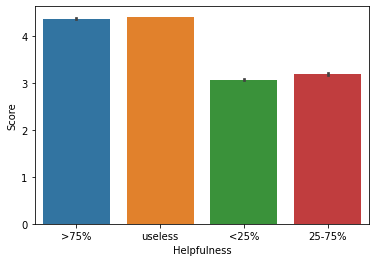

In [34]:
sns.barplot(y='Score',x='Helpfulness',data=data)
plt.show()

`Observation:`***From the above it is observed that the least ratings occured mostly in <25%.***

Sentiment Count plot

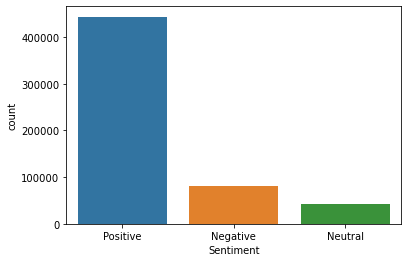

In [17]:
sns.countplot(x='Sentiment',data=data)
plt.show()

`Observation:`***From the above most of the reviews given by customers are positive.*** 

Sentiment vs Score Histplot

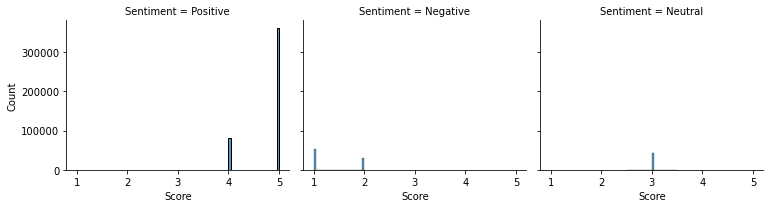

In [22]:
x=sns.FacetGrid(data=data,col='Sentiment',height=3,aspect=1.2)
x.map(sns.histplot,'Score',bins=20)
plt.show()

`Observation:`***With respect to Score values sentiment based reviews are shown.***

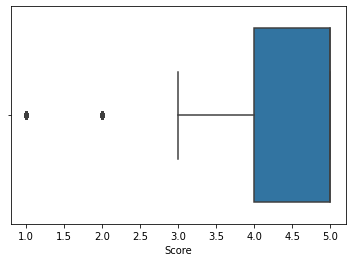

In [18]:
sns.boxplot(x='Score',data=data)
plt.show()

`Observation:`**Most of the outliers occurs between 1-2 ratings of score.**

Pie chart Ratings

In [25]:
data.Score.value_counts()

5    362930
4     80627
1     52231
3     42614
2     29765
Name: Score, dtype: int64

([<matplotlib.patches.Wedge at 0x23b514f1e20>,
 [Text(-0.9290369568901302, 1.994214214354197, '5-Rating'),
  Text(-0.5507714149758541, -2.1299415129166097, '4-Rating'),
  Text(1.0189875158193085, -1.949785742743134, '1-Rating'),
  Text(1.8583424901107066, -1.177524177861813, '3-Rating'),
  Text(2.1702715403308015, -0.36044616967054954, '2-Rating')],
 [Text(-0.5067474310309801, 1.0877532078295618, '63.88%'),
  Text(-0.3004207718050113, -1.161786279772696, '14.19%'),
  Text(0.5558113722650773, -1.0635194960417094, '9.19%'),
  Text(1.0136413582422035, -0.6422859151973525, '7.50%'),
  Text(1.1837844765440735, -0.19660700163848155, '5.24%')])

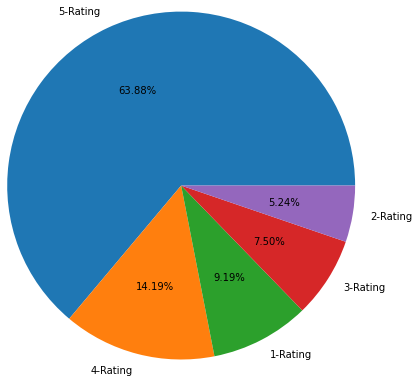

In [26]:
plt.pie([362930,80627,52231,42614,29765],labels=['5-Rating','4-Rating','1-Rating','3-Rating','2-Rating'],autopct="%0.2f%%",radius=2)

`Observation:`**Product ratings**

**Data Preprocessing:**

In [80]:
df_rev=pd.read_csv("Sentiment_analysis cleaned data.csv")
df_rev.head()

,Unnamed: 0,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment,Helpfulness
0,0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...,Positive,useless
1,1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...,Positive,useless
2,2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...,Positive,useless
3,3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...,Positive,useless
4,4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ...",Positive,useless


In [6]:
df_rev.drop('Unnamed: 0',axis=1,inplace=True)
df_rev

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Sentiment,Helpfulness
0,0006641040,ASH0DZQQF6AIZ,tessarat,0,0,5,1970-01-16 08:15:21.600,A classic,I remembered this book from my childhood and ...,Positive,useless
1,0006641040,A1DJXZA5V5FFVA,A. Conway,0,0,5,1970-01-16 11:44:09.600,Must have.,I set aside at least an hour each day to read...,Positive,useless
2,0006641040,A2ONB6ZA292PA,Rosalind Matzner,0,0,5,1970-01-16 04:58:04.800,Chicken soup with Rice,It's a great book with adorable illustrations...,Positive,useless
3,0006641040,A2RTT81R6Y3R7X,Lindylu,0,0,5,1970-01-16 01:59:31.200,One of our family's favorite books,This book is a family favorite and was read t...,Positive,useless
4,0006641040,A3OI7ZGH6WZJ5G,"Mary Jane Rogers ""Maedchen""",0,0,5,1970-01-15 23:24:00.000,Darling!,"The same author wrote ""Where the Wild Things ...",Positive,useless
...,...,...,...,...,...,...,...,...,...,...,...
568162,B009UOFTUI,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative,useless
568163,B009UOFU20,AJVB004EB0MVK,D. Christofferson,0,0,1,1970-01-16 13:50:52.800,weak coffee not good for a premium product an...,"This coffee supposedly is premium, it tastes ...",Negative,useless
568164,B009UUS05I,ARL20DSHGVM1Y,Jamie,0,0,5,1970-01-16 09:57:36.000,Perfect,The basket was the perfect sympathy gift when...,Positive,useless
568165,B009WSNWC4,AMP7K1O84DH1T,ESTY,0,0,5,1970-01-16 15:20:09.600,DELICIOUS,Purchased this product at a local store in NY...,Positive,useless


`Type-`**Supervised**

`Task-`**Classifier**

`Target-`**Score**

***Separating review columns from target variable sentiment:***

In [7]:
x=df_rev[["ReviewText","ReviewSummary"]]
x

,ReviewText,ReviewSummary
0,I remembered this book from my childhood and ...,A classic
1,I set aside at least an hour each day to read...,Must have.
2,It's a great book with adorable illustrations...,Chicken soup with Rice
3,This book is a family favorite and was read t...,One of our family's favorite books
4,"The same author wrote ""Where the Wild Things ...",Darling!
...,...,...
568162,"This coffee supposedly is premium, it tastes ...",weak coffee not good for a premium product an...
568163,"This coffee supposedly is premium, it tastes ...",weak coffee not good for a premium product an...
568164,The basket was the perfect sympathy gift when...,Perfect
568165,Purchased this product at a local store in NY...,DELICIOUS


In [8]:
y=df_rev[['Sentiment']]
y

,Sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive
...,...
568162,Negative
568163,Negative
568164,Positive
568165,Positive


**Splitting the Data into Train and Test:**

In [9]:
import sklearn

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)

In [11]:
X_train

,ReviewText,ReviewSummary
40555,I don't believe people should know I have a p...,"Clean, green"
458839,These are perfect for traveling. On the airpl...,Tastes the best
180063,This makes the best raisin bread toast. Easy ...,Great Raisin bread
138263,"Delicious chocolate candy, ideal for snacks f...",a toddler-sized chocolate treat
111519,I have tried several different dark chocolate...,By Far the Best Green Tea Dark Chocolate
...,...,...
344414,I bought this to use with vegetables and know...,india curry paste
212912,I love the burst of energy that I get and I o...,Great Product!!!
65615,No its not that good. But yes i was able to m...,I cant believe its not egg
210755,"I've bought this trail mix a few times, and i...",Pretty good ...


In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426125, 2) (426125, 1)
(142042, 2) (142042, 1)


**Text Preprocessing Steps:**

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
stemmer = PorterStemmer()

In [15]:
lemmatizer = WordNetLemmatizer()

In [16]:
X_train=X_train.applymap(lambda s :s.lower() if type(s)==str else s)

In [17]:
X_train

,ReviewText,ReviewSummary
40555,i don't believe people should know i have a p...,"clean, green"
458839,these are perfect for traveling. on the airpl...,tastes the best
180063,this makes the best raisin bread toast. easy ...,great raisin bread
138263,"delicious chocolate candy, ideal for snacks f...",a toddler-sized chocolate treat
111519,i have tried several different dark chocolate...,by far the best green tea dark chocolate
...,...,...
344414,i bought this to use with vegetables and know...,india curry paste
212912,i love the burst of energy that i get and i o...,great product!!!
65615,no its not that good. but yes i was able to m...,i cant believe its not egg
210755,"i've bought this trail mix a few times, and i...",pretty good ...


In [18]:
y_train=y_train.applymap(lambda s :s.lower() if type(s)==str else s)

In [19]:
X_test=X_test.applymap(lambda s :s.lower() if type(s)==str else s)

In [20]:
y_test=y_test.applymap(lambda s :s.lower() if type(s)==str else s)

In [21]:
def striphtml(data):
    p = re.compile(r'<.*?>hhtp//+s|www\.\S+')
    return p.sub('', data)
X_train["ReviewText"]=X_train["ReviewText"].apply(lambda data:striphtml(data))

In [22]:
X_train["ReviewSummary"]=X_train["ReviewSummary"].apply(lambda data:striphtml(data))
X_test["ReviewText"]=X_test["ReviewText"].apply(lambda data:striphtml(data))
X_test["ReviewSummary"]=X_test["ReviewSummary"].apply(lambda data:striphtml(data))

In [23]:
X_test

,ReviewText,ReviewSummary
538281,i have only tried quaker oatmeal raisin cooki...,love quaker but not the best product
428278,with 190 calories for a six cracker packet wi...,fantastic snack
25178,i get this product since where i live there i...,great service
327872,that's what my cat would say. this is the bes...,superb!
73126,my husband really likes seaseme chips so i or...,sesame blues chips
...,...,...
192007,"like another customer, i bought this product ...",szeged hot paprika
430840,i grew up enjoying rice a roni and it's vermi...,very nice addition to my pantry and table
193807,i got 24 pack of this can food a while ago fo...,my cat loves it!
114681,"the raisans are hard and yucky, but pick them...",wish it were without the raisans!


In [24]:
import string
punct_to_remove=string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('','',punct_to_remove))
X_train["ReviewText"]=X_train["ReviewText"].apply(lambda text: remove_punctuation(text))

In [25]:
X_train["ReviewSummary"]=X_train["ReviewSummary"].apply(lambda text: remove_punctuation(text))
X_test["ReviewText"]=X_test["ReviewText"].apply(lambda text: remove_punctuation(text))
X_test["ReviewSummary"]=X_test["ReviewSummary"].apply(lambda text: remove_punctuation(text))

In [26]:
def preprocess(raw_text, flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

In [27]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [28]:
X_train["final"] = X_train["ReviewText"] + X_train["ReviewSummary"]
X_train.head()

,ReviewText,ReviewSummary,final
40555,i dont believe people should know i have a pe...,clean green,i dont believe people should know i have a pe...
458839,these are perfect for traveling on the airpla...,tastes the best,these are perfect for traveling on the airpla...
180063,this makes the best raisin bread toast easy t...,great raisin bread,this makes the best raisin bread toast easy t...
138263,delicious chocolate candy ideal for snacks fo...,a toddlersized chocolate treat,delicious chocolate candy ideal for snacks fo...
111519,i have tried several different dark chocolate...,by far the best green tea dark chocolate,i have tried several different dark chocolate...


In [29]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
temp_df1 = X_train['final'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df1.head()

100%|████████████████████████████████████████████████████████████████████████| 426125/426125 [2:06:09<00:00, 56.29it/s]


,0,1
40555,dont believe people know pet smell house there...,56
458839,perfect traveling airplane offer peanut pretze...,18
180063,make best raisin bread toast easy make bread m...,15
138263,delicious chocolate candy ideal snack toddler ...,26
111519,tried several different dark chocolate infused...,16


In [31]:
temp_df1.columns = ['clean_text_lem', 'text_length_stem']

temp_df1.head()

,clean_text_lem,text_length_stem
40555,dont believe people know pet smell house there...,56
458839,perfect traveling airplane offer peanut pretze...,18
180063,make best raisin bread toast easy make bread m...,15
138263,delicious chocolate candy ideal snack toddler ...,26
111519,tried several different dark chocolate infused...,16


In [32]:
X_train = pd.concat([X_train, temp_df1], axis=1)

X_train.head()

,ReviewText,ReviewSummary,final,clean_text_lem,text_length_stem
40555,i dont believe people should know i have a pe...,clean green,i dont believe people should know i have a pe...,dont believe people know pet smell house there...,56
458839,these are perfect for traveling on the airpla...,tastes the best,these are perfect for traveling on the airpla...,perfect traveling airplane offer peanut pretze...,18
180063,this makes the best raisin bread toast easy t...,great raisin bread,this makes the best raisin bread toast easy t...,make best raisin bread toast easy make bread m...,15
138263,delicious chocolate candy ideal for snacks fo...,a toddlersized chocolate treat,delicious chocolate candy ideal for snacks fo...,delicious chocolate candy ideal snack toddler ...,26
111519,i have tried several different dark chocolate...,by far the best green tea dark chocolate,i have tried several different dark chocolate...,tried several different dark chocolate infused...,16


In [33]:
y_train

,Sentiment
40555,positive
458839,positive
180063,positive
138263,positive
111519,positive
...,...
344414,positive
212912,positive
65615,positive
210755,positive


**Bag of Words:**

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer()

X_train_bow = vocab.fit_transform(X_train['clean_text_lem'])

In [35]:
X_train_bow

<426125x170310 sparse matrix of type '<class 'numpy.int64'>'
	with 13721750 stored elements in Compressed Sparse Row format>

In [36]:
print("Total unique words:", len(vocab.vocabulary_))

print("Type of train features:", type(X_train_bow))

print("Shape of input data:", X_train_bow.shape)

Total unique words: 170310
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (426125, 170310)


In [37]:
from sys import getsizeof

print(type(X_train_bow))
print(getsizeof(X_train_bow), "Bytes")

<class 'scipy.sparse.csr.csr_matrix'>
48 Bytes


In [38]:
X_test.head()

,ReviewText,ReviewSummary
538281,i have only tried quaker oatmeal raisin cooki...,love quaker but not the best product
428278,with 190 calories for a six cracker packet wi...,fantastic snack
25178,i get this product since where i live there i...,great service
327872,thats what my cat would say this is the best ...,superb
73126,my husband really likes seaseme chips so i or...,sesame blues chips


In [39]:
X_test["final"] = X_test["ReviewText"] + X_test["ReviewSummary"]
X_test.head()

,ReviewText,ReviewSummary,final
538281,i have only tried quaker oatmeal raisin cooki...,love quaker but not the best product,i have only tried quaker oatmeal raisin cooki...
428278,with 190 calories for a six cracker packet wi...,fantastic snack,with 190 calories for a six cracker packet wi...
25178,i get this product since where i live there i...,great service,i get this product since where i live there i...
327872,thats what my cat would say this is the best ...,superb,thats what my cat would say this is the best ...
73126,my husband really likes seaseme chips so i or...,sesame blues chips,my husband really likes seaseme chips so i or...


In [40]:
temp_df = X_test['final'].progress_apply(lambda x: preprocess(x, 'lemma'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████| 142042/142042 [41:24<00:00, 57.17it/s]


,0,1
538281,tried quaker oatmeal raisin cooky favorite how...,17
428278,calorie six cracker packet pepper jack great s...,35
25178,get product since live place buy itbr product ...,15
327872,thats cat would say best food ive found cat ex...,76
73126,husband really like seaseme chip ordered packa...,21


In [41]:
temp_df.columns = ['clean_text_lemma', 'text_length_stem']

temp_df.head()

,clean_text_lemma,text_length_stem
538281,tried quaker oatmeal raisin cooky favorite how...,17
428278,calorie six cracker packet pepper jack great s...,35
25178,get product since live place buy itbr product ...,15
327872,thats cat would say best food ive found cat ex...,76
73126,husband really like seaseme chip ordered packa...,21


In [42]:
X_test = pd.concat([X_test, temp_df], axis=1)

X_test.head()

,ReviewText,ReviewSummary,final,clean_text_lemma,text_length_stem
538281,i have only tried quaker oatmeal raisin cooki...,love quaker but not the best product,i have only tried quaker oatmeal raisin cooki...,tried quaker oatmeal raisin cooky favorite how...,17
428278,with 190 calories for a six cracker packet wi...,fantastic snack,with 190 calories for a six cracker packet wi...,calorie six cracker packet pepper jack great s...,35
25178,i get this product since where i live there i...,great service,i get this product since where i live there i...,get product since live place buy itbr product ...,15
327872,thats what my cat would say this is the best ...,superb,thats what my cat would say this is the best ...,thats cat would say best food ive found cat ex...,76
73126,my husband really likes seaseme chips so i or...,sesame blues chips,my husband really likes seaseme chips so i or...,husband really like seaseme chip ordered packa...,21


In [43]:
X_test_bow = vocab.transform(X_test['clean_text_lemma'])

In [44]:
X_test_bow

<142042x170310 sparse matrix of type '<class 'numpy.int64'>'
	with 4551967 stored elements in Compressed Sparse Row format>

***Model-Building:***

****DecisionTreeClassifier:****

In [45]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
%%time
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_bow, y_train)

CPU times: total: 31min 3s
Wall time: 32min 47s


DecisionTreeClassifier()

In [85]:
y_test_pred = classifier.predict(X_test_bow)

In [86]:
y_test_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [87]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

0.8706720547443714


****LogisticRegression:****

In [88]:
%%time
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_bow, y_train)

CPU times: total: 44.7 s
Wall time: 34.3 s


LogisticRegression()

In [89]:
y_test_pred = classifier.predict(X_test_bow)
y_test_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [90]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

0.8898213204545135


****RandomForestClassifier:****

In [46]:
%%time
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_bow, y_train)

CPU times: total: 2h 25min 58s
Wall time: 3h 32min 19s


RandomForestClassifier()

In [47]:
y_test_predict = classifier.predict(X_test_bow)
y_test_predict 

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [48]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_predict))

0.8897438785711268


****MultinomialNB:****

In [68]:
%%time
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_bow, y_train)
y_pred_class_nb = nb.predict(X_test_bow)

CPU times: total: 1.5 s
Wall time: 5.65 s


In [70]:
from sklearn import metrics
NB=metrics.accuracy_score(y_test, y_pred_class_nb)
print(NB)

0.8621956885991467


****SVC:****

In [77]:
%%time
from sklearn import svm
lrsvc = svm.LinearSVC()
# train the model using X_train_dtm
lrsvc.fit(X_train_bow, y_train)


CPU times: total: 4min 44s
Wall time: 7min 16s


LinearSVC()

In [78]:
y_testpredict= lrsvc.predict(X_test_bow)
y_testpredict

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [79]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_testpredict))


print(classification_report(y_test, y_testpredict))

0.896558764309148
              precision    recall  f1-score   support

    negative       0.80      0.77      0.78     20577
     neutral       0.62      0.41      0.50     10553
    positive       0.93      0.97      0.95    110912

    accuracy                           0.90    142042
   macro avg       0.78      0.72      0.74    142042
weighted avg       0.89      0.90      0.89    142042



**Comparision of Models:**

`DecisionTreeClassifier` - **0.8706720547443714**

`LogisticRegression`     - **0.8898213204545135**

`RandomForestClassifier` - **0.8897438785711268**

`MultinomialNB`          - **0.8621956885991467**

`SupportVectorClassifier`- **0.896558764309148**


**while comparing above models it is observed that SVC has best accuracy score in predicting than Logistic Regression,SVC took lesstime than Logistic Regression and Multinomial Navie baye's with least accuracy with less time.**